In [2]:
import fiftyone as fo
dataset : fo.Dataset = fo.load_dataset("rach3")
# session = fo.launch_app(dataset, auto=False)
dataset

Name:        rach3
Media type:  video
Num samples: 293
Persistent:  True
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.VideoMetadata)
    session:  fiftyone.core.fields.StringField
Frame fields:
    id:                 fiftyone.core.fields.ObjectIdField
    frame_number:       fiftyone.core.fields.FrameNumberField
    keyboard:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    hand_landmarker_mp: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Keypoints)

In [4]:
import partitura as pt

midi_fn = dataset.first().filepath.replace('mp4', 'mid').replace('full_', '')

perf = pt.load_performance_midi(midi_fn)

note_array = perf.note_array()

piano_roll = pt.utils.compute_pianoroll(
    note_array, 
    time_unit="sec", 
    time_div=8, 
    piano_range=True
)

piano_roll

/Users/kevinserrano/anaconda3/envs/hands/lib/python3.11/site-packages/partitura/utils/music.py:1296: UserWarning: Do not consider drum track for computing piano roll
  warnings.warn("Do not consider drum track for computing piano roll")


<88x3581 sparse matrix of type '<class 'numpy.int64'>'
	with 17832 stored elements in Compressed Sparse Column format>

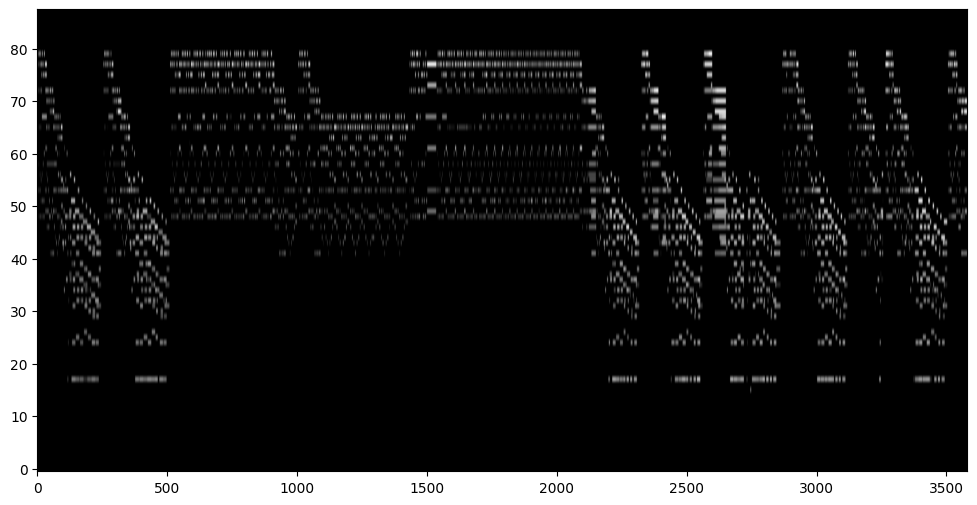

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.imshow(piano_roll.toarray(), aspect='auto', origin='lower', cmap='gray')